In [1]:
import pandas as pd
import numpy as np

# import Descriptors

chemblId = pd.read_csv('CHEMBL206_IC50_Regress.csv', header = 0)
len(chemblId)

1366

In [2]:
chemblId.head(2)

,chemblId,value,SMILES_desalt
0,CHEMBL370037,6.0,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21
1,CHEMBL189073,1727.0,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1


In [3]:
# Convert IC 50 to pIC 50

from math import log10
pIC50 = []

for i in chemblId.value:
    molar = i*(10**-9) # Converts nM to M
    pIC50.append(-log10(molar))
#Y = pIC50

chemblId['pIC50'] = pIC50
chemblId = chemblId.drop('value', 1)

with open('SubFiles/CHEMBL206_IC50_pIC50.csv', 'wb') as f:
    f.write(b'pIC50\n')
    np.savetxt(f, pIC50, fmt="%s")

In [4]:
chemblId.head(2)

,chemblId,SMILES_desalt,pIC50
0,CHEMBL370037,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21,8.221849
1,CHEMBL189073,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1,5.762708


In [5]:
chemblId.loc[chemblId['pIC50'].idxmax()]

chemblId                                            CHEMBL195515
SMILES_desalt    CCC(=C(c1ccc(O)cc1)c1ccc(C=CC(=O)O)cc1)c1ccccc1
pIC50                                                    9.82391
Name: 972, dtype: object

In [6]:
chemblId.loc[chemblId['pIC50'].idxmin()]

chemblId                                             CHEMBL1083326
SMILES_desalt    CC(C)=CCc1c(C2CCc3ccc(O)cc3O2)cc(O)c(O)c1CC=C(C)C
pIC50                                                      3.82074
Name: 813, dtype: object

# Descriptor calculation
Lipinski's rule-of-five descriptors are computed for investigating its chemical space as a function of its drug-likeness properties:

In [7]:
from rdkit.Chem import Descriptors
from rdkit.Chem import SmilesMolSupplier

mols = SmilesMolSupplier("CHEMBL206_IC50.smi")
#mols = SDMolSupplier("molecule.sdf")

MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

with open('SubFiles/CHEMBL206_IC50-MW.csv', 'wb') as f:
    f.write(b'MW\n')
    np.savetxt(f, MW)
with open('SubFiles/CHEMBL206_IC50-LogP.csv', 'wb') as f:
    f.write(b'LogP\n')
    np.savetxt(f, LogP)
with open('SubFiles/CHEMBL206_IC50-nHAcc.csv', 'wb') as f:
    f.write(b'nHAcc\n')  
    np.savetxt(f, nHAcc)
with open('SubFiles/CHEMBL206_IC50-nHDon.csv', 'wb') as f:
    f.write(b'nHDon\n') 
    np.savetxt(f, nHDon)

# Creating the histogram plots
Let's now make the histogram plots of the descriptors

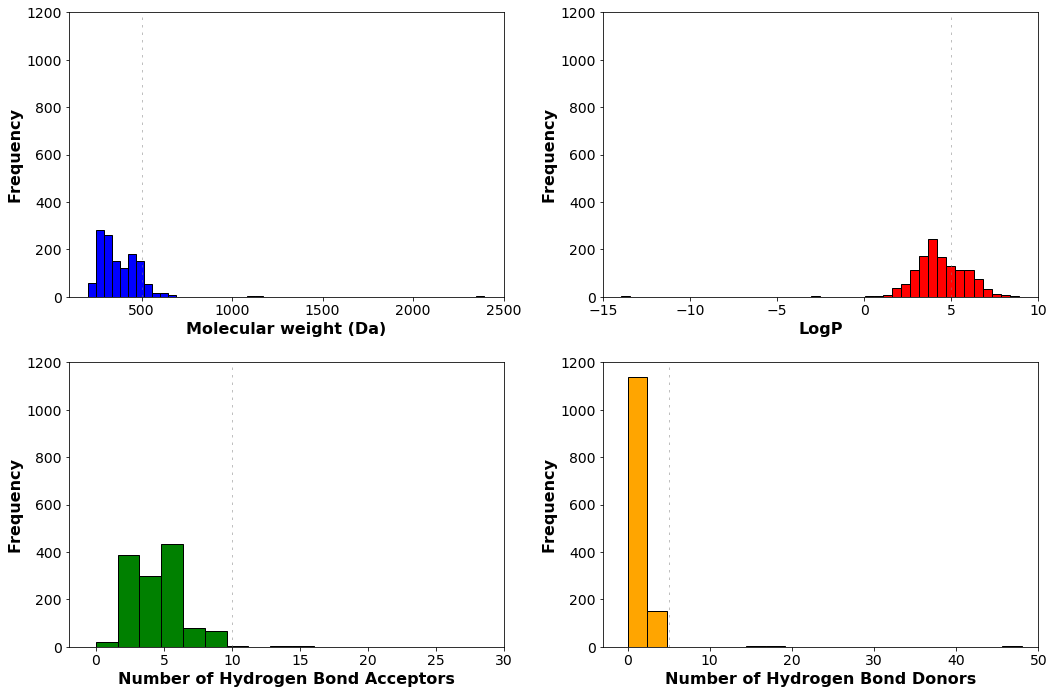

In [8]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

# Histogram for MW
hist, bins = np.histogram(MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(200,900)
plt1.set_ylim(0, 1200)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for LogP
hist, bins = np.histogram(LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(-15,10)
plt2.set_ylim(0,1200)
#plt2.grid(True)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
# Histogram for nHAcc
hist, bins = np.histogram(nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(-2,30)
plt3.set_ylim(0,1200)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for nHDon
hist, bins = np.histogram(nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(-3,50)
plt4.set_ylim(0,1200)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('Result/ER_Alpha-the histogram plots of the descriptors.pdf', dpi=300)

# Binning Data

In [9]:
# Grouping to single CSV

pIC50 = pd.read_csv('SubFiles/CHEMBL206_IC50_pIC50.csv', header = 0)
MW = pd.read_csv('SubFiles/CHEMBL206_IC50-MW.csv', header = 0)
LogP = pd.read_csv('SubFiles/CHEMBL206_IC50-LogP.csv', header = 0)
nHAcc = pd.read_csv('SubFiles/CHEMBL206_IC50-nHAcc.csv', header = 0)
nHDon = pd.read_csv('SubFiles/CHEMBL206_IC50-nHDon.csv', header = 0)
SMILES_desalt = pd.read_csv('CHEMBL206_IC50.smi', header = 0)

RAW = pd.concat([pIC50, MW, LogP, nHAcc, nHDon, SMILES_desalt], axis=1)
RAW.to_csv('SubFiles/CHEMBL206_IC50_all.csv', sep=',')

In [10]:
Binning = pd.DataFrame(RAW, columns=['pIC50', 'MW', 'LogP', 'nHAcc', 'nHDon', 'SMILES_desalt'])

In [11]:
MW_0_100=   (Binning[(0   < Binning.MW) & (Binning.MW <= 100 )])
MW_100_200= (Binning[(100 < Binning.MW) & (Binning.MW <= 200 )])
MW_200_300= (Binning[(200 < Binning.MW) & (Binning.MW <= 300 )])
MW_300_400= (Binning[(300 < Binning.MW) & (Binning.MW <= 400 )])
MW_400_500= (Binning[(400 < Binning.MW) & (Binning.MW <= 500 )])
MW_500_600= (Binning[(500 < Binning.MW) & (Binning.MW <= 600 )])
MW_600_700= (Binning[(600 < Binning.MW) & (Binning.MW <= 700 )])
MW_700_800= (Binning[(700 < Binning.MW) & (Binning.MW <= 800 )])
MW_800_900= (Binning[(800 < Binning.MW) & (Binning.MW <= 900 )])
MW_900_1000=(Binning[(900 < Binning.MW) & (Binning.MW <= 1000)])

mean0_100 =   (Binning[(0   < Binning.MW) & (Binning.MW <= 100 )]['pIC50'].mean())
mean100_200 = (Binning[(100 < Binning.MW) & (Binning.MW <= 200 )]['pIC50'].mean())
mean200_300 = (Binning[(200 < Binning.MW) & (Binning.MW <= 300 )]['pIC50'].mean())
mean300_400 = (Binning[(300 < Binning.MW) & (Binning.MW <= 400 )]['pIC50'].mean())
mean400_500 = (Binning[(400 < Binning.MW) & (Binning.MW <= 500 )]['pIC50'].mean())
mean500_600 = (Binning[(500 < Binning.MW) & (Binning.MW <= 600 )]['pIC50'].mean())
mean600_700 = (Binning[(600 < Binning.MW) & (Binning.MW <= 700 )]['pIC50'].mean())
mean700_800 = (Binning[(700 < Binning.MW) & (Binning.MW <= 800 )]['pIC50'].mean())
mean800_900 = (Binning[(800 < Binning.MW) & (Binning.MW <= 900 )]['pIC50'].mean())
mean900_1000= (Binning[(900 < Binning.MW) & (Binning.MW <= 1000)]['pIC50'].mean())

std0_100 = (Binning[(0 < Binning.MW) & (Binning.MW <= 100)]['pIC50'].std())
std100_200 = (Binning[(100 < Binning.MW) & (Binning.MW <= 200)]['pIC50'].std())
std200_300 = (Binning[(200 < Binning.MW) & (Binning.MW <= 300)]['pIC50'].std())
std300_400 = (Binning[(300 < Binning.MW) & (Binning.MW <= 400)]['pIC50'].std())
std400_500 = (Binning[(400 < Binning.MW) & (Binning.MW <= 500)]['pIC50'].std())
std500_600 = (Binning[(500 < Binning.MW) & (Binning.MW <= 600)]['pIC50'].std())
std600_700 = (Binning[(600 < Binning.MW) & (Binning.MW <= 700)]['pIC50'].std())
std700_800 = (Binning[(700 < Binning.MW) & (Binning.MW <= 800)]['pIC50'].std())
std800_900 = (Binning[(800 < Binning.MW) & (Binning.MW <= 900)]['pIC50'].std())
std900_1000 = (Binning[(900 < Binning.MW) & (Binning.MW <= 1000)]['pIC50'].std())


outfile = open('binning.csv', 'a')

print >> outfile, 'MW'
print >> outfile, 'n 0-100,   mean 0-100  , std 0-100,'   + \
                  'n 100-200, mean 100-200, std 100-200,' + \
                  'n 200-300, mean 200-300, std 200-300,' + \
                  'n 300-400, mean 300-400, std 300-400,' + \
                  'n 400-500, mean 400-500, std 400-500,' + \
                  'n 500-600, mean 500-600, std 500-600,' + \
                  'n 600-700, mean 600-700, std 600-700,' + \
                  'n 700-800, mean 700-800, std 700-800,' + \
                  'n 800-900, mean 800-900, std 800-900,' + \
                  'n 900-1000,mean 900-1000,std 900-1000'
                    
print >> outfile, '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(MW_0_100), mean0_100, std0_100,
                                        len(MW_100_200), mean100_200, std100_200,
                                        len(MW_200_300), mean200_300, std200_300,
                                        len(MW_300_400), mean300_400, std300_400,
                                        len(MW_400_500), mean400_500, std400_500,
                                        len(MW_500_600), mean500_600, std500_600,
                                        len(MW_600_700), mean600_700, std600_700,
                                        len(MW_700_800), mean700_800, std700_800,
                                        len(MW_800_900), mean800_900, std800_900,
                                        len(MW_900_1000), mean900_1000, std900_1000)
                                        
outfile.close()  

In [12]:
LogP_0  = (Binning[(Binning.LogP <= 0 )])
LogP_0_1= (Binning[(0 < Binning.LogP) & (Binning.LogP <= 1 )])
LogP_1_2= (Binning[(1 < Binning.LogP) & (Binning.LogP <= 2 )])
LogP_2_3= (Binning[(2 < Binning.LogP) & (Binning.LogP <= 3 )])
LogP_3_4= (Binning[(3 < Binning.LogP) & (Binning.LogP <= 4 )])
LogP_4_5= (Binning[(4 < Binning.LogP) & (Binning.LogP <= 5 )])
LogP_5_6= (Binning[(5 < Binning.LogP) & (Binning.LogP <= 6 )])
LogP_6_7= (Binning[(6 < Binning.LogP) & (Binning.LogP <= 7 )])
LogP_7_8= (Binning[(7 < Binning.LogP) & (Binning.LogP <= 8 )])
LogP_8_9= (Binning[(8 < Binning.LogP) & (Binning.LogP <= 9 )])
LogP_9_10=(Binning[(9 < Binning.LogP) & (Binning.LogP <= 10)])

Pmean_0  = (Binning[Binning.LogP <= 0 ]['pIC50'].mean())
Pmean0_1 = (Binning[(0 < Binning.LogP) & (Binning.LogP <= 1 )]['pIC50'].mean())
Pmean1_2 = (Binning[(1 < Binning.LogP) & (Binning.LogP <= 2 )]['pIC50'].mean())
Pmean2_3 = (Binning[(2 < Binning.LogP) & (Binning.LogP <= 3 )]['pIC50'].mean())
Pmean3_4 = (Binning[(3 < Binning.LogP) & (Binning.LogP <= 4 )]['pIC50'].mean())
Pmean4_5 = (Binning[(4 < Binning.LogP) & (Binning.LogP <= 5 )]['pIC50'].mean())
Pmean5_6 = (Binning[(5 < Binning.LogP) & (Binning.LogP <= 6 )]['pIC50'].mean())
Pmean6_7 = (Binning[(6 < Binning.LogP) & (Binning.LogP <= 7 )]['pIC50'].mean())
Pmean7_8 = (Binning[(7 < Binning.LogP) & (Binning.LogP <= 8 )]['pIC50'].mean())
Pmean8_9 = (Binning[(8 < Binning.LogP) & (Binning.LogP <= 9 )]['pIC50'].mean())
Pmean9_10= (Binning[(9 < Binning.LogP) & (Binning.LogP <= 10)]['pIC50'].mean())

Pstd_0 = (Binning[Binning.LogP <= 0 ]['pIC50'].std())
Pstd0_1 = (Binning[(0 < Binning.LogP) & (Binning.LogP <= 1)]['pIC50'].std())
Pstd1_2 = (Binning[(1 < Binning.LogP) & (Binning.LogP <= 2)]['pIC50'].std())
Pstd2_3 = (Binning[(2 < Binning.LogP) & (Binning.LogP <= 3)]['pIC50'].std())
Pstd3_4 = (Binning[(3 < Binning.LogP) & (Binning.LogP <= 4)]['pIC50'].std())
Pstd4_5 = (Binning[(4 < Binning.LogP) & (Binning.LogP <= 5)]['pIC50'].std())
Pstd5_6 = (Binning[(5 < Binning.LogP) & (Binning.LogP <= 6)]['pIC50'].std())
Pstd6_7 = (Binning[(6 < Binning.LogP) & (Binning.LogP <= 7)]['pIC50'].std())
Pstd7_8 = (Binning[(7 < Binning.LogP) & (Binning.LogP <= 8)]['pIC50'].std())
Pstd8_9 = (Binning[(8 < Binning.LogP) & (Binning.LogP <= 9)]['pIC50'].std())
Pstd9_10 = (Binning[(9 < Binning.LogP) & (Binning.LogP <= 10)]['pIC50'].std())


outfile = open('binning.csv', 'a')

print >> outfile, 'LogP'
print >> outfile, 'n  <0, mean <0,  std <0,'  + \
                  'n 0-1, mean 0-1, std 0-1,' + \
                  'n 1-2, mean 1-2, std 1-2,' + \
                  'n 2-3, mean 2-3, std 2-3,' + \
                  'n 3-4, mean 3-4, std 3-4,' + \
                  'n 4-5, mean 4-5, std 4-5,' + \
                  'n 5-6, mean 5-6, std 5-6,' + \
                  'n 6-7, mean 6-7, std 6-7,' + \
                  'n 7-8, mean 7-8, std 7-8,' + \
                  'n 8-9, mean 8-9, std 8-9,' + \
                  'n 9-10,mean 9-10, std 9-10'
                    
print >> outfile, '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(LogP_0),   Pmean_0,  Pstd_0,
                                        len(LogP_0_1), Pmean0_1, Pstd0_1,
                                        len(LogP_1_2), Pmean1_2, Pstd1_2,
                                        len(LogP_2_3), Pmean2_3, Pstd2_3,
                                        len(LogP_3_4), Pmean3_4, Pstd3_4,
                                        len(LogP_4_5), Pmean4_5, Pstd4_5,
                                        len(LogP_5_6), Pmean5_6, Pstd5_6,
                                        len(LogP_6_7), Pmean6_7, Pstd6_7,
                                        len(LogP_7_8), Pmean7_8, Pstd7_8,
                                        len(LogP_8_9), Pmean8_9, Pstd8_9,
                                        len(LogP_9_10),Pmean9_10,Pstd9_10)
                                        
outfile.close() 

In [13]:
nHAcc_0 = (Binning[Binning.nHAcc== 0 ])
nHAcc_1 = (Binning[Binning.nHAcc== 1 ])
nHAcc_2 = (Binning[Binning.nHAcc== 2 ])
nHAcc_3 = (Binning[Binning.nHAcc== 3 ])
nHAcc_4 = (Binning[Binning.nHAcc== 4 ])
nHAcc_5 = (Binning[Binning.nHAcc== 5 ])
nHAcc_6 = (Binning[Binning.nHAcc== 6 ])
nHAcc_7 = (Binning[Binning.nHAcc== 7 ])
nHAcc_8 = (Binning[Binning.nHAcc== 8 ])
nHAcc_9 = (Binning[Binning.nHAcc== 9 ])
nHAcc_10= (Binning[Binning.nHAcc== 10])

Amean_0 = (Binning[Binning.nHAcc== 0 ]['pIC50'].mean())
Amean_1 = (Binning[Binning.nHAcc== 1 ]['pIC50'].mean())
Amean_2 = (Binning[Binning.nHAcc== 2 ]['pIC50'].mean())
Amean_3 = (Binning[Binning.nHAcc== 3 ]['pIC50'].mean())
Amean_4 = (Binning[Binning.nHAcc== 4 ]['pIC50'].mean())
Amean_5 = (Binning[Binning.nHAcc== 5 ]['pIC50'].mean())
Amean_6 = (Binning[Binning.nHAcc== 6 ]['pIC50'].mean())
Amean_7 = (Binning[Binning.nHAcc== 7 ]['pIC50'].mean())
Amean_8 = (Binning[Binning.nHAcc== 8 ]['pIC50'].mean())
Amean_9 = (Binning[Binning.nHAcc== 9 ]['pIC50'].mean())
Amean_10= (Binning[Binning.nHAcc== 10]['pIC50'].mean())

Astd_0 = (Binning[Binning.nHAcc== 0 ]['pIC50'].std())
Astd_1 = (Binning[Binning.nHAcc== 1 ]['pIC50'].std())
Astd_2 = (Binning[Binning.nHAcc== 2 ]['pIC50'].std())
Astd_3 = (Binning[Binning.nHAcc== 3 ]['pIC50'].std())
Astd_4 = (Binning[Binning.nHAcc== 4 ]['pIC50'].std())
Astd_5 = (Binning[Binning.nHAcc== 5 ]['pIC50'].std())
Astd_6 = (Binning[Binning.nHAcc== 6 ]['pIC50'].std())
Astd_7 = (Binning[Binning.nHAcc== 7 ]['pIC50'].std())
Astd_8 = (Binning[Binning.nHAcc== 8 ]['pIC50'].std())
Astd_9 = (Binning[Binning.nHAcc== 9 ]['pIC50'].std())
Astd_10 =(Binning[Binning.nHAcc== 10]['pIC50'].std())


outfile = open('binning.csv', 'a')

print >> outfile, 'nHAcc'
print >> outfile, 'n 0, mean 0, std 0,' + \
                  'n 1, mean 1, std 1,' + \
                  'n 2, mean 2, std 2,' + \
                  'n 3, mean 3, std 3,' + \
                  'n 4, mean 4, std 4,' + \
                  'n 5, mean 5, std 5,' + \
                  'n 6, mean 6, std 6,' + \
                  'n 7, mean 7, std 7,' + \
                  'n 8, mean 8, std 8,' + \
                  'n 9, mean 9, std 9,' + \
                  'n 10,mean 10,std 10'
                    
print >> outfile,  '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(nHAcc_1), Amean_1, Astd_1,
                                        len(nHAcc_0), Amean_0, Astd_0,
                                        len(nHAcc_2), Amean_2, Astd_2,
                                        len(nHAcc_3), Amean_3, Astd_3,
                                        len(nHAcc_4), Amean_4, Astd_4,
                                        len(nHAcc_5), Amean_5, Astd_5,
                                        len(nHAcc_6), Amean_6, Astd_6,
                                        len(nHAcc_7), Amean_7, Astd_7,
                                        len(nHAcc_8), Amean_8, Astd_8,
                                        len(nHAcc_9), Amean_9, Astd_9,
                                        len(nHAcc_10),Amean_10,Astd_10)
                                        
outfile.close()  

In [14]:
nHDon_0 = (Binning[Binning.nHAcc== 0 ])
nHDon_1 = (Binning[Binning.nHDon== 1 ])
nHDon_2 = (Binning[Binning.nHDon== 2 ])
nHDon_3 = (Binning[Binning.nHDon== 3 ])
nHDon_4 = (Binning[Binning.nHDon== 4 ])
nHDon_5 = (Binning[Binning.nHDon== 5 ])
nHDon_6 = (Binning[Binning.nHDon== 6 ])
nHDon_7 = (Binning[Binning.nHDon== 7 ])
nHDon_8 = (Binning[Binning.nHDon== 8 ])
nHDon_9 = (Binning[Binning.nHDon== 9 ])
nHDon_10= (Binning[Binning.nHDon== 10])

Dmean_0 = (Binning[Binning.nHDon== 0 ]['pIC50'].mean())
Dmean_1 = (Binning[Binning.nHDon== 1 ]['pIC50'].mean())
Dmean_2 = (Binning[Binning.nHDon== 2 ]['pIC50'].mean())
Dmean_3 = (Binning[Binning.nHDon== 3 ]['pIC50'].mean())
Dmean_4 = (Binning[Binning.nHDon== 4 ]['pIC50'].mean())
Dmean_5 = (Binning[Binning.nHDon== 5 ]['pIC50'].mean())
Dmean_6 = (Binning[Binning.nHDon== 6 ]['pIC50'].mean())
Dmean_7 = (Binning[Binning.nHDon== 7 ]['pIC50'].mean())
Dmean_8 = (Binning[Binning.nHDon== 8 ]['pIC50'].mean())
Dmean_9 = (Binning[Binning.nHDon== 9 ]['pIC50'].mean())
Dmean_10= (Binning[Binning.nHDon== 10]['pIC50'].mean())

Dstd_0 = (Binning[Binning.nHDon== 0 ]['pIC50'].std())
Dstd_1 = (Binning[Binning.nHDon== 1 ]['pIC50'].std())
Dstd_2 = (Binning[Binning.nHDon== 2 ]['pIC50'].std())
Dstd_3 = (Binning[Binning.nHDon== 3 ]['pIC50'].std())
Dstd_4 = (Binning[Binning.nHDon== 4 ]['pIC50'].std())
Dstd_5 = (Binning[Binning.nHDon== 5 ]['pIC50'].std())
Dstd_6 = (Binning[Binning.nHDon== 6 ]['pIC50'].std())
Dstd_7 = (Binning[Binning.nHDon== 7 ]['pIC50'].std())
Dstd_8 = (Binning[Binning.nHDon== 8 ]['pIC50'].std())
Dstd_9 = (Binning[Binning.nHDon== 9 ]['pIC50'].std())
Dstd_10 =(Binning[Binning.nHDon== 10]['pIC50'].std())

outfile = open('binning.csv', 'a')

print >> outfile, 'nHDon'
print >> outfile, 'n 0, mean 0, std 0,' + \
                  'n 1, mean 1, std 1,' + \
                  'n 2, mean 2, std 2,' + \
                  'n 3, mean 3, std 3,' + \
                  'n 4, mean 4, std 4,' + \
                  'n 5, mean 5, std 5,' + \
                  'n 6, mean 6, std 6,' + \
                  'n 7, mean 7, std 7,' + \
                  'n 8, mean 8, std 8,' + \
                  'n 9, mean 9, std 9,' + \
                  'n 10,mean 10,std 10'
                    
print >> outfile,  '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(nHDon_0), Dmean_0, Dstd_0,
                                        len(nHDon_1), Dmean_1, Dstd_1,
                                        len(nHDon_2), Dmean_2, Dstd_2,
                                        len(nHDon_3), Dmean_3, Dstd_3,
                                        len(nHDon_4), Dmean_4, Dstd_4,
                                        len(nHDon_5), Dmean_5, Dstd_5,
                                        len(nHDon_6), Dmean_6, Dstd_6,
                                        len(nHDon_7), Dmean_7, Dstd_7,
                                        len(nHDon_8), Dmean_8, Dstd_8,
                                        len(nHDon_9), Dmean_9, Dstd_9,
                                        len(nHDon_10),Dmean_10,Dstd_10)
                                        
outfile.close()  

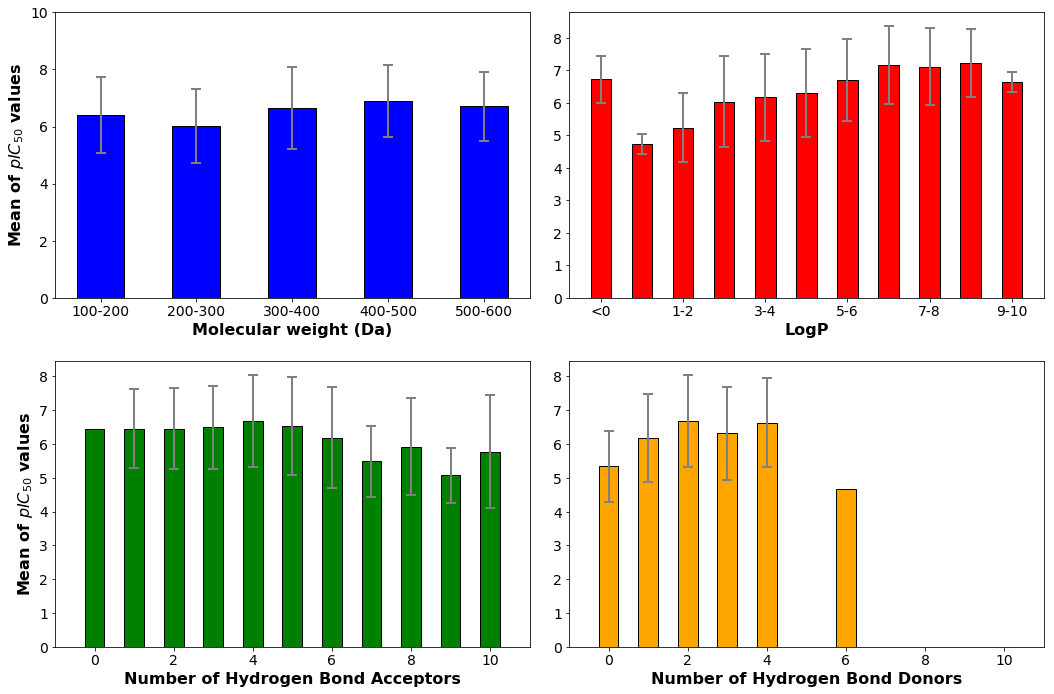

In [15]:
figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)


# Histogram for MW
mean1 = ((mean0_100),(mean100_200),(mean200_300),(mean300_400),(mean400_500), \
      (mean500_600),(mean600_700),(mean700_800),(mean800_900),(mean900_1000))
std1 = ((std0_100),(std100_200),(std200_300),(std300_400),(std400_500), \
      (std500_600),(std600_700),(std700_800),(std800_900),(std900_1000))
index = np.arange(len(mean1))  # the x locations for the groups

plt1.bar(index, mean1, width=0.5, color='blue', align='center', yerr=std1, edgecolor='black', \
         ecolor='k', error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
labels1 = ('0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000')
plt1.set_xticklabels(labels1, fontdict=None, minor=False, rotation=0)
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(0,10)
plt1.set_ylim(0,10)
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Mean of $pIC_{50}$ values', fontsize=16, fontweight='bold')
#plt1.grid(True)

# Histogram for LogP
mean2 = ((Pmean_0),(Pmean0_1),(Pmean1_2),(Pmean2_3),(Pmean3_4),(Pmean4_5), \
      (Pmean5_6),(Pmean6_7),(Pmean7_8),(Pmean8_9),(Pmean9_10))
std2  = ((Pstd_0),(Pstd0_1),(Pstd1_2),(Pstd2_3),(Pstd3_4),(Pstd4_5), \
      (Pstd5_6),(Pstd6_7),(Pstd7_8),(Pstd8_9),(Pstd9_10))
index2 = np.arange(len(mean2))  # the x locations for the groups

plt2.bar(index2, mean2, width=0.5, color='red', align='center', edgecolor='black' ,\
         yerr=std2, ecolor='k',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
labels2 = ('','<0','1-2','3-4','5-6','7-8','9-10','x','x','x','x','x')
#labels2 = ('','0-1','2-3','4-5','6-7','8-9','10-11','x','x','x','x')
plt2.set_xticklabels(labels2, fontdict=None, minor=False)

#.set_xlim(-10,10)
#plt2.set_ylim(0,10)
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
#plt2.set_ylabel('Average $pIC_{50}$ values', fontsize=16, fontweight='bold')
#plt2.grid(True)

# Histogram for nHAcc
mean = ((Amean_0),(Amean_1),(Amean_2),(Amean_3),(Amean_4),(Amean_5),(Amean_6),(Amean_7),(Amean_8),(Amean_9),(Amean_10))
std = ((Astd_0),(Astd_1),(Astd_2),(Astd_3),(Astd_4),(Astd_5),(Astd_6),(Astd_7),(Astd_8),(Astd_9),(Astd_10))
index3 = np.arange(len(mean))  # the x locations for the groups

plt3.bar(index3, mean, width=0.5, color='green', align='center', edgecolor='black', \
         yerr=std, ecolor='k',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
#labels = ('','0','2','4','6','8','10','x','x','x','x')
plt3.set_xlim(-1,11)
#plt3.set_ylim(0,10)
#plt3.set_xticklabels(labels, fontdict=None, minor=False)
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Mean of $pIC_{50}$ values', fontsize=16, fontweight='bold')
#plt3.grid(True)


# Histogram for nHDon
mean = ((Dmean_0),(Dmean_1),(Dmean_2),(Dmean_3),(Dmean_4),(Dmean_5),(Dmean_6),(Dmean_7),(Dmean_8),(Dmean_9),(Dmean_10))
std = ((Dstd_0),(Dstd_1),(Dstd_2),(Dstd_3),(Dstd_4),(Dstd_5),(Dstd_6),(Dstd_7),(Dstd_8),(Dstd_9),(Dstd_10))
index = np.arange(len(mean))  # the x locations for the groups

plt4.bar(index, mean, width=0.5, color='orange', align='center', edgecolor='black', \
         yerr=std, ecolor='k',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
#labels = ('','0','2','4','6','8','10','x','x','x','x')
plt4.set_xlim(-1,11)
#plt4.set_ylim(0,10)
#plt4.set_xticklabels(labels, fontdict=None, minor=False)
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
#plt4.set_ylabel('Average $pIC_{50}$ values', fontsize=16, fontweight='bold')
#plt4.grid(True)



plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('Result/ER_Alpha-Average pIC50 plots of the descriptors by range.pdf', dpi=300)

# Build function

In [16]:
def Remove_useless_descriptor(data, h):
    STDEV = np.std(data, axis=0)
    idx = [idx for idx, val in enumerate(STDEV) if val > 0.05]
    X = data[:,idx]
    hx = np.array(h)[idx]
    
    
    print '\n\n************************************************************************************'
    print ''
    print (f)
    print ''
    print "The initial set of " + str(len(data[0])) + \
          " descriptors has been reduced to " + str(len(X[0])) + " descriptors."
    
    return X, hx

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from collections import defaultdict
import os.path
import shutil

def build_model(X, Y, seed, hx, f):
    
    
    #Data split using 70/30 ratio
    X_internal, X_external, Y_internal, Y_external = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    rf = RandomForestRegressor(n_estimators=500, max_features='sqrt', n_jobs=-1)
    rf.fit(X_internal,Y_internal)
    prediction = rf.predict(X_internal)
    
    inter = pd.DataFrame(Y_internal, columns=['Y_internal'])
    Pinter = pd.DataFrame(prediction, columns=['prediction'])

    result = pd.concat([inter, Pinter], axis=1, join='inner').to_csv(f+str(seed)+"_Inter_pred.csv", header=False, index=False)
    
    # Cross-validation
    cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    # External set
    rf_external = RandomForestRegressor(n_estimators=500, max_features='sqrt', n_jobs=-1)
    rf_external.fit(X_internal,Y_internal)
    
    prediction_external = rf.predict(X_external)
    
    ext = pd.DataFrame(Y_external, columns=['Y_external'])
    Pext = pd.DataFrame(prediction_external, columns=['prediction'])

    result = pd.concat([ext, Pext], axis=1, join='inner').to_csv(f+str(seed)+"_Ext_pred.csv", header=False, index=False)
    
    #print result from each seed
    
    R2_train.append(r2_score(Y_internal, prediction))
    RMSE_train.append(np.sqrt(mean_squared_error(Y_internal, prediction)))
    Q2_CV.append(r2_score(Y_internal, cv))
    RMSE_CV.append(np.sqrt(mean_squared_error(Y_internal, cv)))
    Q2_External.append(r2_score(Y_external, prediction_external))
    RMSE_External.append((mean_squared_error(Y_external, prediction_external)))
    
    #Feature Importance
    Feature = hx[:]
    feature_importance = rf.feature_importances_
    importances = 100.0 * (feature_importance / feature_importance.max()) #index
    
    for i, fx in enumerate(Feature):
        importances_dict[fx].append(importances[i])
    
    return R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict

/Users/zeromtmu/anaconda2/envs/ER_QSAR/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/zeromtmu/anaconda2/envs/ER_QSAR/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
from copy import deepcopy

def Y_scrambling(X_internal, X_external, Y_internal, Y_external):
    # Do the Y-scrambling. Loop over the actual learning for 30 times.
    for randomseedcounter in range(1,101):
        y_train_scrambled = deepcopy(Y_internal)
        X_train_scrambled = deepcopy(X_internal)
        np.random.shuffle(y_train_scrambled)
        np.random.shuffle(X_train_scrambled)

        # training was done on "scrambled" data - prediction on test set
        RF_scrambled         = RandomForestRegressor()
        RF_scrambled         = RF_scrambled.fit(X_internal,y_train_scrambled)
        y_predict_scrambled  = RF_scrambled.predict(X_external)
    
        acclist_predictionOnTest_scrambledtrain.append((RF_scrambled.score(X_external,Y_external))**2)
    
        # training was done on "scrambled" data - prediction on train set
        y_predict_scrambled_predictTrain  = RF_scrambled.predict(X_internal)
    
        acclist_predictionOnTrain_scrambledtrain.append((RF_scrambled.score(X_internal,Y_internal))**2)
        
        r2 = pd.DataFrame(acclist_predictionOnTrain_scrambledtrain, columns=['R2'])
        q2 = pd.DataFrame(acclist_predictionOnTest_scrambledtrain, columns=['Q2'])

        #result = pd.concat([r2, q2], axis=1, join='inner').to_csv(f+"_Y_scrambling.csv", header=False, index=False)
        
        
    return acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain

In [19]:
def mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_mean = np.mean(R2_train)
    RMSE_train_mean = np.mean(RMSE_train)
    Q2_CV_mean = np.mean(Q2_CV)
    RMSE_CV_mean = np.mean(RMSE_CV)
    Q2_External_mean = np.mean(Q2_External)
    RMSE_External_mean = np.mean(RMSE_External)
    importances_mean0 = {}
    for fx in importances_dict:
        importances_mean0[fx] = np.mean(importances_dict[fx])
    importances_mean = sorted([(k,v) for k,v in importances_mean0.iteritems()],
                                    key=lambda x: x[1], reverse=True)
    
    #predictionOnTest_mean = np.mean(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_mean = np.mean(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
            RMSE_External_mean, importances_mean

In [20]:
def std(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_std = np.std(R2_train)
    RMSE_train_std = np.std(RMSE_train)
    Q2_CV_std = np.std(Q2_CV)
    RMSE_CV_std = np.std(RMSE_CV)
    Q2_External_std = np.std(Q2_External)
    RMSE_External_std = np.std(RMSE_External)
    importances_std0 = {}
    for fx in importances_dict:
        importances_std0[fx] = np.std(importances_dict[fx])
    importances_std = sorted([(k,v) for k,v in importances_std0.iteritems()],
                                    key=lambda x: x[1], reverse=True)
    #predictionOnTest_std = np.std(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_std = np.std(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
            RMSE_External_std, importances_std

In [21]:
def print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f ):
    #outfile = open('all_output.csv', 'a')
    print >> outfile, '%s,%d,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f' \
                                     % (f, len(X_internal),
                                        len(X[0]),
                                        R2_train_mean, R2_train_std,
                                        RMSE_train_mean, RMSE_train_std,
                                        len(X_internal),
                                        Q2_CV_mean, Q2_CV_std,
                                        RMSE_CV_mean, RMSE_CV_std,
                                        len(X_external),
                                        Q2_External_mean, Q2_External_std,
                                        RMSE_External_mean, RMSE_External_std,
                                       )    
        
        
    
    print '\nTraining set\n------------'
    print 'N: ' + (str(len(X_internal)))
    print 'R2: %0.4f'%(R2_train_mean)
    print 'std_R2: %0.4f'%(R2_train_std)
    print 'RMSE: %0.4f'%(RMSE_train_mean)
    print 'std_RMSE: %0.4f'%(RMSE_train_std)

    print '\nCross-validation set\n------------'
    print 'N: ' + (str(len(X_internal)))
    print 'Q2: %0.4f'%(Q2_CV_mean)
    print 'std_Q2: %0.4f'%(Q2_CV_std)
    print 'RMSE: %0.4f'%(RMSE_CV_mean)
    print 'std_RMSE: %0.4f'%(RMSE_CV_std)

    print '\nExternal set\n------------'
    print 'N: ' + (str(len(X_external)))
    print 'Q2_EXt: %0.4f'%(Q2_External_mean)
    print 'std_Q2_EXt: %0.4f'%(Q2_External_std)
    print 'RMSE: %0.4f'%(RMSE_External_mean)
    print 'std_RMSE: %0.4f'%(RMSE_External_std)

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as py 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

def plot_model (f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction, 
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain):
    
    # Prepare plot
    m  = rf.fit(X_internal,Y_internal)
    cm = plt.cm.RdBu
    cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=5

    # Train Set
    x_train = np.array(Y_internal)
    y_train = m.predict(X_internal).flatten()
    py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
            c='g', cmap=cm ,edgecolors='g')
                 #label=r"$R^{2}_{Tr}$ = %.4f" % R2_train_mean)
    
    
    # CV Set
    np.array(cv)
    x_test = np.array(Y_internal)
    y_test = cv
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
        #2SD line
    X = sm.add_constant(x_test)
    res = sm.OLS(y_test, X).fit()

    st, data, ss2 = summary_table(res, alpha=0.05)
    fittedvalues = data[:,2]
        #predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T
        #2SD line
    plt.plot(X, predict_ci_low, '--b', linewidth=0.5, alpha=0.5)
    plt.plot(X, predict_ci_upp, '--b', linewidth=0.5, alpha=0.5)
    #plt.plot(X, predict_mean_ci_low, 'g--')
    #plt.plot(X, predict_mean_ci_upp, 'g--')
        
    # External Set
    x_test = np.array(Y_external)
    y_test = m.predict(X_external).flatten()
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='r', cmap=cm ,edgecolors='r') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
    
    
    #py.plot(x_train, np.polyval(np.polyfit(x_train,y_train,1), x_train), '--r') #mean line
    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
    plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)
        
    min_axis = np.min(np.concatenate([Y_internal, prediction], axis=0))
    max_axis = np.max(np.concatenate([Y_internal, prediction], axis=0))
    plt.xlim([(min_axis*0.9),(max_axis*1.05)])
    plt.ylim([(min_axis*0.9),(max_axis*1.05)])
    plt.tick_params(axis='both', which='major', labelsize=14)

    
    # Save plot to file
    #plt.tight_layout(pad=2.0, w_pad=0.5, h_pad=1.0)
    plt.savefig(f+'_compair_Fp.pdf', dpi=300)
    plt.show()
    
    # Y-scrambling plot
    py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
            
    py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
               s=100, marker='.', alpha=0.3, c='r', cmap=cm ,edgecolors='r')

    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("$Q^{2}$", fontsize=10)
    plt.ylabel("$R^{2}$", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    #plt.grid(b=True, which='major',linestyle='-')
    plt.axhline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    plt.axvline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
    plt.savefig(f+'Y-scrambling.pdf', dpi=300)
    plt.show()

    #Feature Importance 
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=10

    barlist = plt.barh(range(20), [x[1] for x in importances_mean[:20]], 
          color="g", xerr=[x[1] for x in importances_std[:20]], align="center", \
                       error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

    
    plt.yticks(range(20), [x[0] for x in importances_mean[:20]])
    plt.ylim([-1, 20])
    
    plt.xlabel(r"$\bf{Gini}$" + " "+ r"$\bf{index}$", fontsize=12)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=2.0)
    plt.savefig(f+'_Feature_importances.pdf', dpi=300)
    plt.show()

## Constructing the QSAR model

/Users/zeromtmu/anaconda2/envs/ER_QSAR/lib/python2.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix




************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/AtomPairs2DFingerprintCount.csv

The initial set of 780 descriptors has been reduced to 284 descriptors.

Training set
------------
N: 909
R2: 0.9617
std_R2: 0.0014
RMSE: 0.2672
std_RMSE: 0.0041

Cross-validation set
------------
N: 909
Q2: 0.7243
std_Q2: 0.0091
RMSE: 0.7172
std_RMSE: 0.0124

External set
------------
N: 390
Q2_EXt: 0.7382
std_Q2_EXt: 0.0172
RMSE: 0.4940
std_RMSE: 0.0385


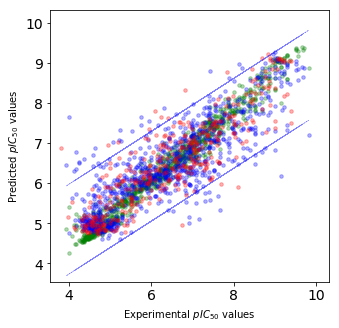

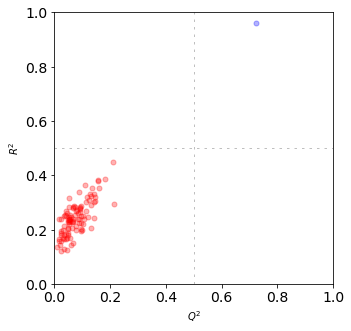

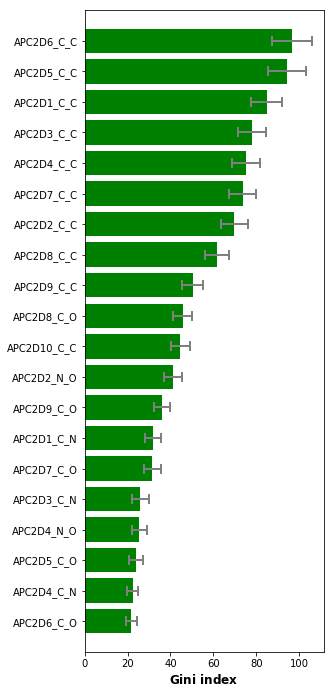



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/AtomPairs2DFingerprinter.csv

The initial set of 780 descriptors has been reduced to 249 descriptors.

Training set
------------
N: 909
R2: 0.9014
std_R2: 0.0053
RMSE: 0.4289
std_RMSE: 0.0128

Cross-validation set
------------
N: 909
Q2: 0.6427
std_Q2: 0.0154
RMSE: 0.8164
std_RMSE: 0.0165

External set
------------
N: 390
Q2_EXt: 0.6599
std_Q2_EXt: 0.0271
RMSE: 0.6416
std_RMSE: 0.0552


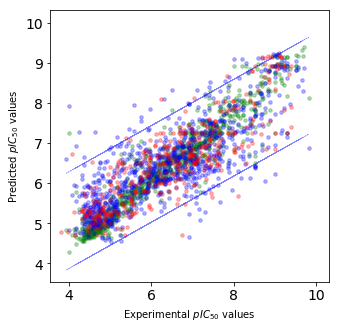

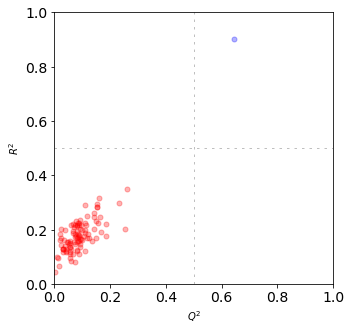

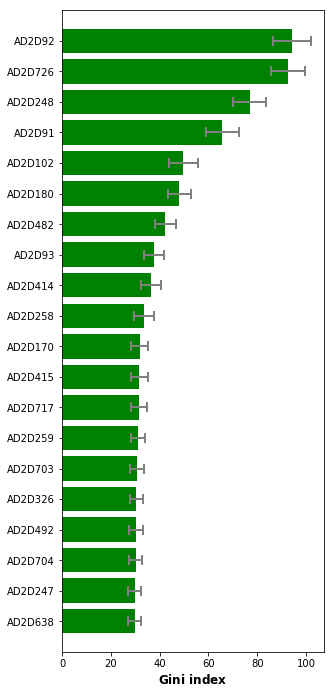



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/EStateFingerprinter.csv

The initial set of 79 descriptors has been reduced to 34 descriptors.

Training set
------------
N: 909
R2: 0.8787
std_R2: 0.0048
RMSE: 0.4758
std_RMSE: 0.0110

Cross-validation set
------------
N: 909
Q2: 0.6793
std_Q2: 0.0093
RMSE: 0.7736
std_RMSE: 0.0114

External set
------------
N: 390
Q2_EXt: 0.6930
std_Q2_EXt: 0.0212
RMSE: 0.5791
std_RMSE: 0.0439


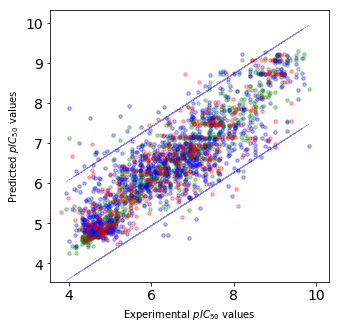

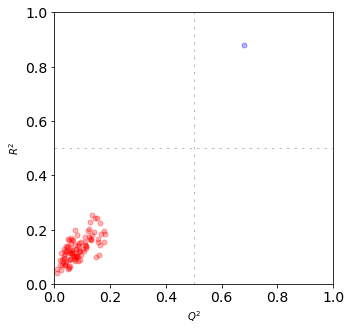

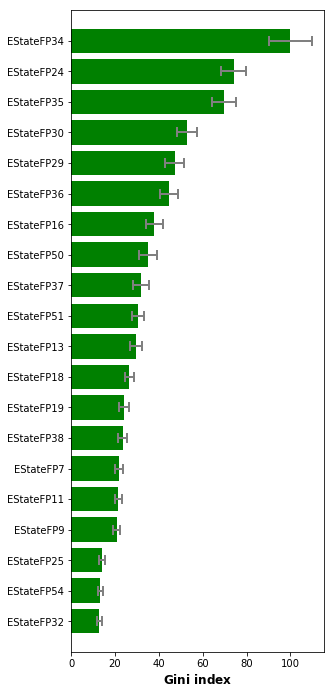



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/ExtendedFingerprinter.csv

The initial set of 1024 descriptors has been reduced to 1005 descriptors.

Training set
------------
N: 909
R2: 0.9541
std_R2: 0.0035
RMSE: 0.2927
std_RMSE: 0.0118

Cross-validation set
------------
N: 909
Q2: 0.7102
std_Q2: 0.0100
RMSE: 0.7353
std_RMSE: 0.0090

External set
------------
N: 390
Q2_EXt: 0.7161
std_Q2_EXt: 0.0140
RMSE: 0.5357
std_RMSE: 0.0333


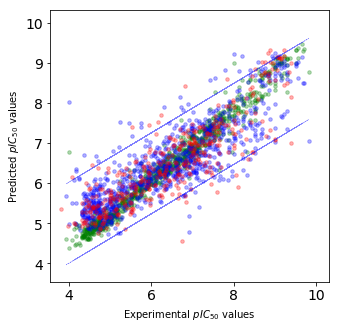

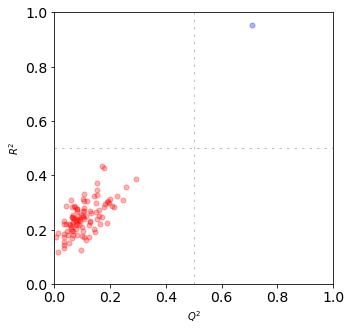

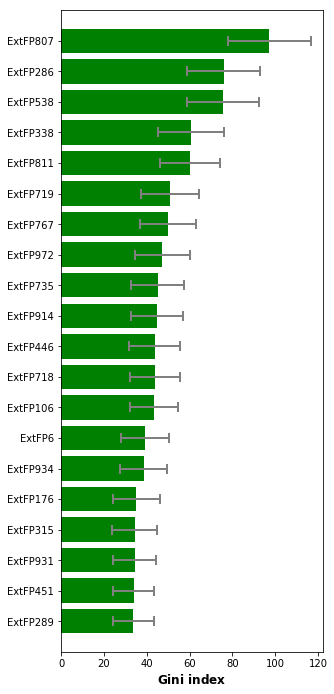



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/Fingerprinter.csv

The initial set of 1024 descriptors has been reduced to 1021 descriptors.

Training set
------------
N: 909
R2: 0.9566
std_R2: 0.0039
RMSE: 0.2844
std_RMSE: 0.0138

Cross-validation set
------------
N: 909
Q2: 0.7269
std_Q2: 0.0102
RMSE: 0.7137
std_RMSE: 0.0120

External set
------------
N: 390
Q2_EXt: 0.7392
std_Q2_EXt: 0.0183
RMSE: 0.4923
std_RMSE: 0.0404


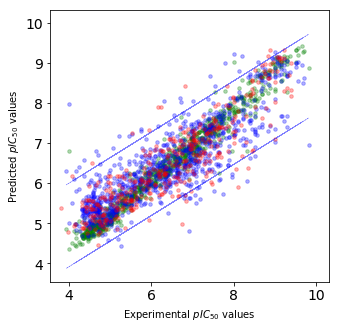

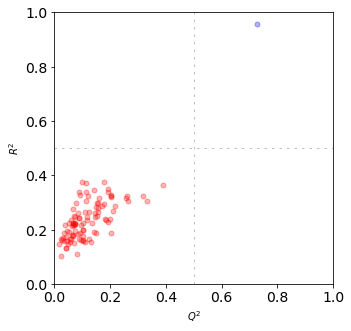

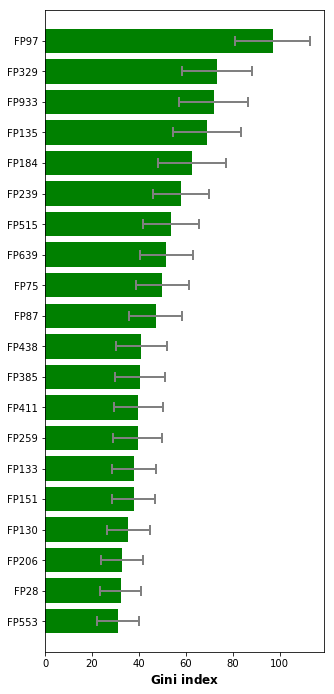



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/GraphOnlyFingerprinter.csv

The initial set of 1024 descriptors has been reduced to 986 descriptors.

Training set
------------
N: 909
R2: 0.9239
std_R2: 0.0056
RMSE: 0.3766
std_RMSE: 0.0155

Cross-validation set
------------
N: 909
Q2: 0.6964
std_Q2: 0.0132
RMSE: 0.7526
std_RMSE: 0.0167

External set
------------
N: 390
Q2_EXt: 0.7108
std_Q2_EXt: 0.0200
RMSE: 0.5454
std_RMSE: 0.0377


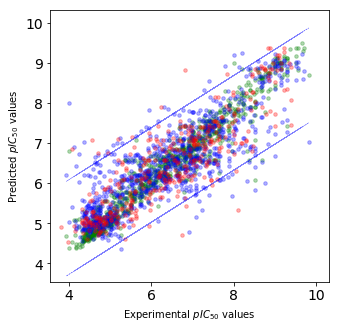

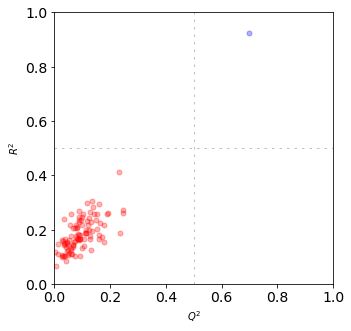

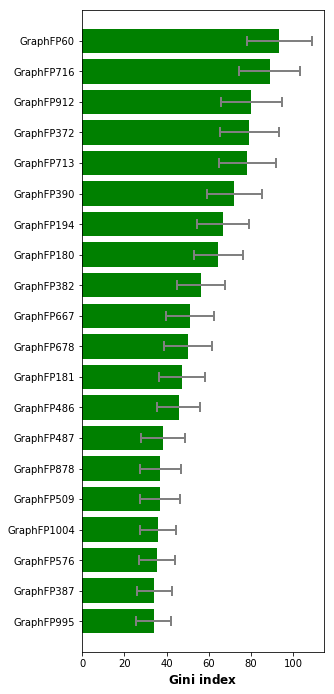



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/KlekotaRothFingerprintCount.csv

The initial set of 4860 descriptors has been reduced to 931 descriptors.

Training set
------------
N: 909
R2: 0.9647
std_R2: 0.0009
RMSE: 0.2569
std_RMSE: 0.0047

Cross-validation set
------------
N: 909
Q2: 0.7473
std_Q2: 0.0072
RMSE: 0.6868
std_RMSE: 0.0134

External set
------------
N: 390
Q2_EXt: 0.7608
std_Q2_EXt: 0.0175
RMSE: 0.4520
std_RMSE: 0.0439


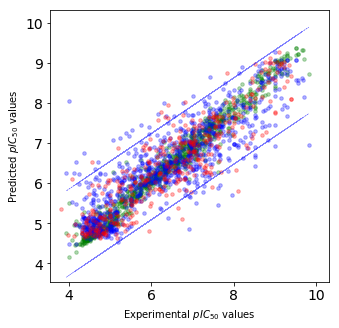

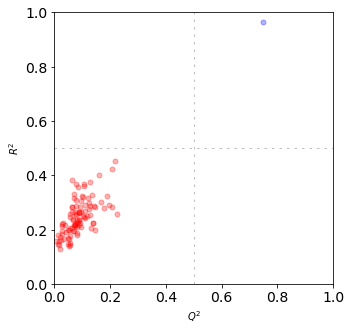

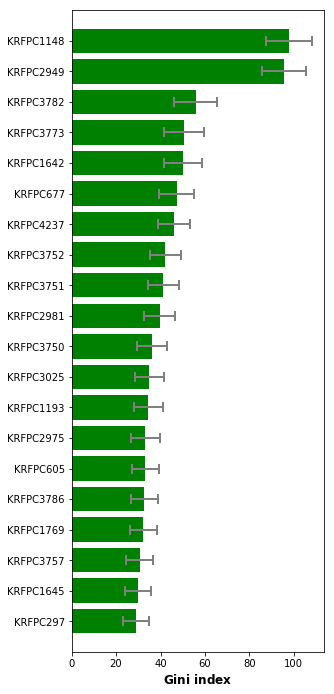



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/KlekotaRothFingerprinter.csv

The initial set of 4860 descriptors has been reduced to 871 descriptors.

Training set
------------
N: 909
R2: 0.9591
std_R2: 0.0035
RMSE: 0.2762
std_RMSE: 0.0132

Cross-validation set
------------
N: 909
Q2: 0.7392
std_Q2: 0.0083
RMSE: 0.6976
std_RMSE: 0.0132

External set
------------
N: 390
Q2_EXt: 0.7522
std_Q2_EXt: 0.0155
RMSE: 0.4679
std_RMSE: 0.0392


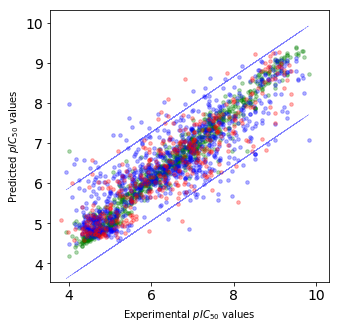

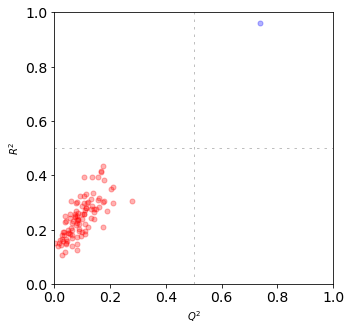

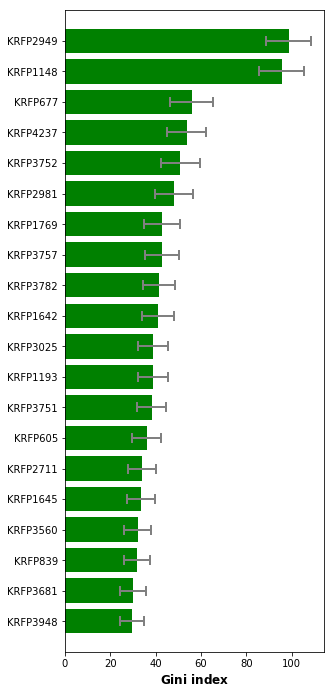



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/MACCSFingerprinter.csv

The initial set of 166 descriptors has been reduced to 142 descriptors.

Training set
------------
N: 909
R2: 0.9468
std_R2: 0.0034
RMSE: 0.3149
std_RMSE: 0.0106

Cross-validation set
------------
N: 909
Q2: 0.7400
std_Q2: 0.0094
RMSE: 0.6966
std_RMSE: 0.0115

External set
------------
N: 390
Q2_EXt: 0.7578
std_Q2_EXt: 0.0151
RMSE: 0.4570
std_RMSE: 0.0330


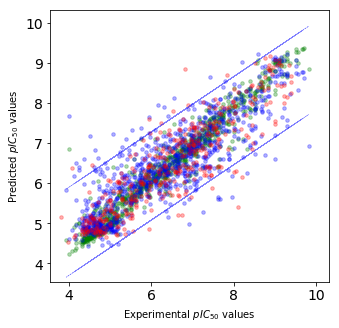

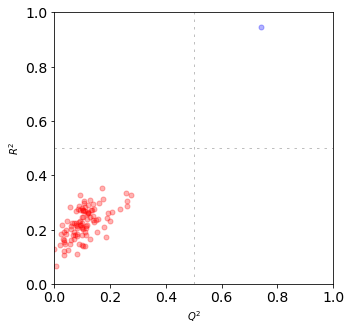

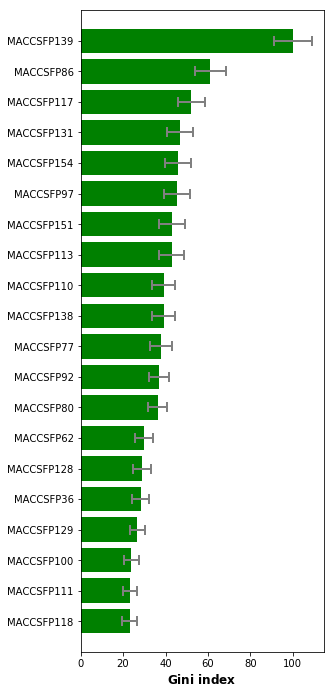



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/PubchemFingerprinter.csv

The initial set of 881 descriptors has been reduced to 532 descriptors.

Training set
------------
N: 909
R2: 0.9504
std_R2: 0.0033
RMSE: 0.3041
std_RMSE: 0.0114

Cross-validation set
------------
N: 909
Q2: 0.7416
std_Q2: 0.0099
RMSE: 0.6943
std_RMSE: 0.0112

External set
------------
N: 390
Q2_EXt: 0.7481
std_Q2_EXt: 0.0197
RMSE: 0.4748
std_RMSE: 0.0354


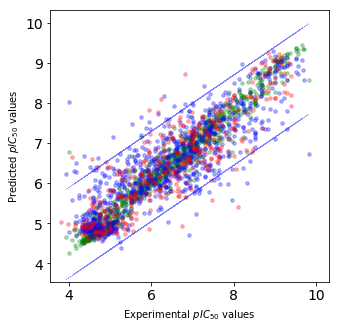

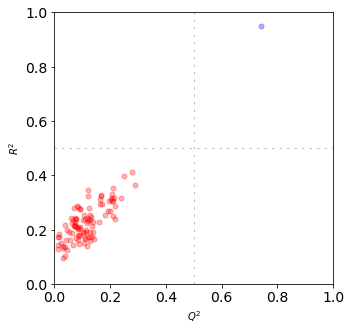

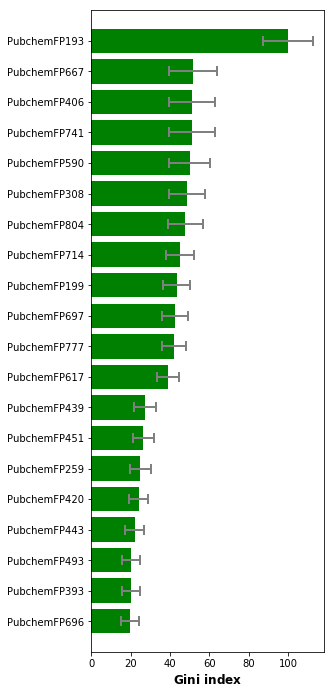



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/SubstructureFingerprintCount.csv

The initial set of 307 descriptors has been reduced to 88 descriptors.

Training set
------------
N: 909
R2: 0.9518
std_R2: 0.0031
RMSE: 0.2999
std_RMSE: 0.0092

Cross-validation set
------------
N: 909
Q2: 0.7368
std_Q2: 0.0080
RMSE: 0.7008
std_RMSE: 0.0085

External set
------------
N: 390
Q2_EXt: 0.7460
std_Q2_EXt: 0.0173
RMSE: 0.4789
std_RMSE: 0.0328


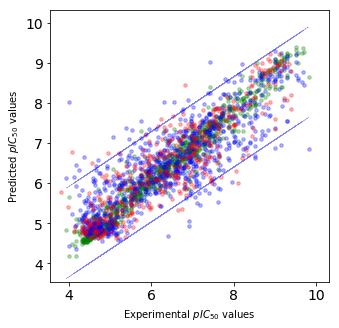

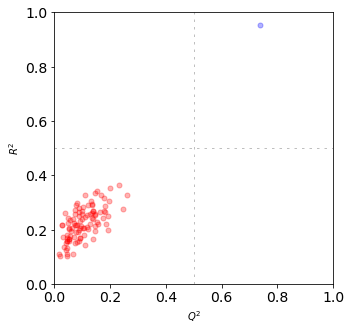

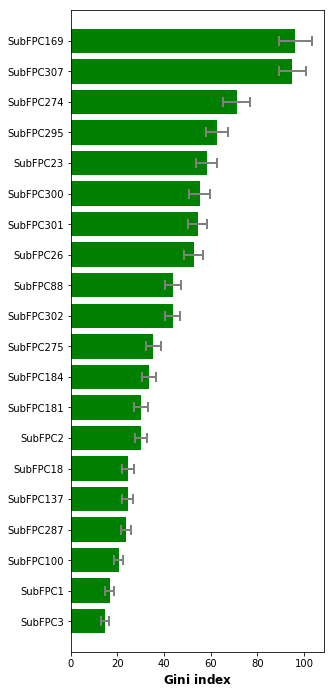



************************************************************************************

/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors/SubstructureFingerprinter.csv

The initial set of 307 descriptors has been reduced to 83 descriptors.

Training set
------------
N: 909
R2: 0.9108
std_R2: 0.0046
RMSE: 0.4080
std_RMSE: 0.0116

Cross-validation set
------------
N: 909
Q2: 0.7084
std_Q2: 0.0091
RMSE: 0.7376
std_RMSE: 0.0091

External set
------------
N: 390
Q2_EXt: 0.7241
std_Q2_EXt: 0.0196
RMSE: 0.5201
std_RMSE: 0.0363


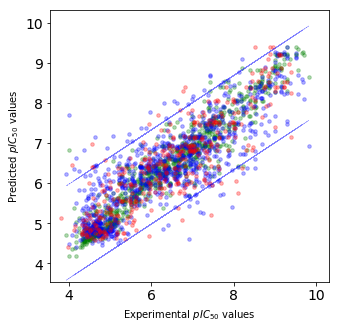

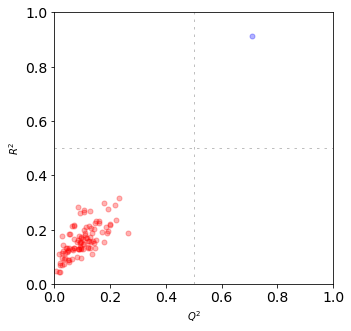

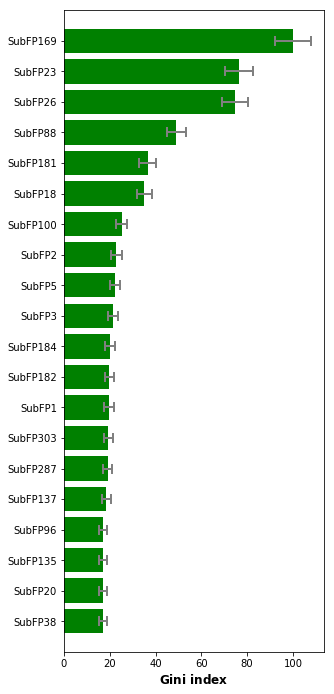

In [28]:
import glob #to read multiple files 
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

outfile = open('Result/CHEMBL206_IC50_all-output.csv', 'a')

print >> outfile, 'Filename,N_train,Descriptors,R2_train,R2_train_std,' + \
                    'RMSE_train,RMSE_train_std,N_CV,Q2_CV,Q2_CV_std,RMSE_CV,' + \
                    'RMSE_CV_std,N_External,Q2_External,Q2_External_std,RMSE_External,RMSD_External_std'

path =r'/Users/zeromtmu/Desktop/2017_run/CHEMBL206_IC50/Manuscript/CHEMBL206_IC50_all-Descriptors'

for f in glob.glob(path + '/*.csv'):
#for f in glob.glob('Descriptors_Modify/*.csv'):
    
    Fp0 = pd.read_csv(f)
    
    # make sure chemblId is correct
    Fp = pd.merge(chemblId, Fp0, left_on = 'chemblId', right_on = 'Name')
    Fp = Fp.drop('Name', 1)
    

    #Fp = chemblId.merge(Fp0, on='chemblId', how='outer')
    
    Y = Fp["pIC50"].tolist()
    data = Fp.ix[:,3:]
    h = data.columns.tolist()
    data = data.as_matrix()
    data = np.array(data)
    
    # Prepare empty lists to plot QSAR model
    R2_train = []
    RMSE_train = []
    Q2_CV = []
    RMSE_CV = []
    Q2_External = []
    RMSE_External = []
    importances_dict = defaultdict(list)
    
    # Prepare empty lists to plot the performance of accuracy.
    acclist_realRF                          = []
    acclist_realRF_predictTrain             = []
    acclist_predictionOnTest_scrambledtrain  = []
    acclist_predictionOnTrain_scrambledtrain = []
    
    X, hx = Remove_useless_descriptor(data, h)
    for i in range(10):
        R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict = build_model(X, Y, i, hx, f)
            
    acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain = Y_scrambling( \
                                                                        X_internal, X_external, Y_internal, Y_external)
    R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
        RMSE_External_mean, importances_mean = mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
        RMSE_External_std, importances_std = std(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f)
    plot_model(f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction,
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain)
    
outfile.close()
    #END